# Komunikacja Cyfrowa
## Programowanie
### Praca domowa 02 [100 pkt]

Proszę użyć tego arkusza do rozwiązania zadań domowych. Na początek proszę zmienić 'nazwisko_imie' na Państwa nazwisko i imie, bez polskich znaków diakrytycznych.

Jak już Państwo zaprogramują wszystko, proszę zapisać arkusz (File->Save and Checkpoint) oraz zapisać arkusz na dysk (File->Download as->Notebook). Ten plik proszę wgrać na classroom. 

**Uwaga** Przed oddaniem pliku warto zrestartować kernel Python-a, i uruchomić wszystkie komórki ręcznie, patrząc czy wszystko jest OK. Błędy rzucane przez interpreter spowodują 0 punktów.

### `statystyka`

Jeżeli nie zdążyliście do końca zaprogramować wszystkich dziesięciu funkcji podstawowych z ćwiczenia 3 na zajęciach, to proszę zaprogramować je do końca teraz i wkleić do pliku `statystyka.py`. Takie zadanie rozgrzewkowe za 0 pkt. Ale jeżeli zdążyliście, to od razu...

### Zadanie 1 Rozwijamy moduł `statystyka`: statystyki wyższych rzędów [30 pkt]
Bazujac na module, zaprogramuj poniższe funkcje i dodaj je do modułu `statystyka.py`
1. `odchylenie_standardowe(L)` - odchylenie standardowe liczb z listy `L`
* `rozstep_kwartylny(L)` - różnica między trzecim i pierwszym kwartylem `L`
* `odchylenie_cwiartkowe(L)` - połowa to rozstepu kwartylnego
* `kurtoza(L)` - kurtozę liczb z listy `L`
* `skosnosc(L)` - współczynnik skośności liczb z listy `L`

Każda funkcja to [6 pkt] - 4 pkt obliczenia, 1 pkt docstring, 1 pkt test. Wszystkie definicje znajdziecie na Wikipedii.

In [12]:
import numseq as ns
import statystyka as st

def odchylenie_standardowe(L):
    '''Funkcja oblicza odchylenie standardowe liczb z listy L.'''
    
    dlugosc_ciagu = ns.dlugosc(L)
    srednia_arytmetyczna = st.srednia_arytmetyczna(L)
    
    suma = 0
    for element in L:
        suma += (element - srednia_arytmetyczna) ** 2
        
    wynik = (suma / dlugosc_ciagu) ** (1/2)
    
    return wynik

print(odchylenie_standardowe([1, 2, 3]))

1.2909944487358056


In [ ]:
def rozstep_kwartylny(L):
    

### Zadanie 2 Rozwijamy moduł `statystyka`: wartości odstające [30 pkt]
Nie ma sztywnej matematycznej definicji określającej wartość odstającą. Ustalenie, czy obserwacja jest wartością odstającą, jest ostatecznie zadaniem subiektywnym. Z braku definicji, **wartość odstająca** to taka, która sporo się różni od większości danych. Istnieją różne metody wykrywania wartości odstających.

Bazując na 2 [definicjach wartości odstających](https://en.wikipedia.org/wiki/Outlier) i modułach `statystyka` oraz `numseq` napisz dwie funkcje wyszukujące wartości odstających 

* `outlier_sixsigma(L, s=3)` - funkcja wyszukująca wartości odstające bazując na 
    ograniczeniu *six sigma*, co oznacza, że wartość `x` jest odstająca
    jeżeli leży poza zakresem $[\mu - s \sigma, \mu + s\sigma]$, gdzie
    $\mu$ to wartość oczekiwana (średnia) a $\sigma$ to odchylenie
    standardowe, a liczba `s>0` to dowolna wartość nieujemna, przyjmująca w 
    modelach *six sigma* wartość `s=3`
    
* `outlier_tukey(L, k=1.5)` - funkcja wyszukująca wartości odstające bazując 
    na ograniczeniu Tukeya (Tukey's fences) mówi, że wartość `x` jest odstająca 
    jeżeli leży poza zakresem $[ Q_1 - k \Delta_Q, Q_3 + k \Delta_Q ]$
    gdzie $Q_1, Q_3$ to odpowiednio dolny i górny kwartyl, $\Delta_Q$ to 
    rozstęp kwartylny, a liczba `k>0` to dowolna wartość nieujemna, 
    John Tukey zaproponował ten test dla `k=1.5`, dlatego też będzie to wartość domyślna

Funkcje powinny sprawdzać czy w serii liczb `L` są jakieś wartości odstające i zwracać słownik wartości odstających i nieodstających `{'odstajace': lista_wartosci_odstajacych, 'nieodstajace': lista_wartosci_nieodstajacych}`

Punkty (na funkcję)
* obliczenia [8 pkt]
* słownik [2 pkt]
* docstring [2 pkt] (gdy sensowny, jeżeli 1-linijkowy to tylko 1 pkt)
* testy - każdy test to 1 punkt, maksymalnie [3 pkt]

Oczywiście obie funkcje proszę zaprogramować poniżej i następnie dodać do modułu `statystyka.py`.

### Standard & Poors 500
Pobawimy się w ekonometrów i opracujemy statystykę dla [S&P 500](https://pl.wikipedia.org/wiki/S%26P_500). Zadanie będzie polegać na obliczeniu podstawowych statystyk rzeczywistych danych dla jednego z najważniejszych indeksów giełdowych świata. Zwykle taka statystyka dla danych opiera się o dwie podstawowe strategie realizowane łącznie

* Podejście ilościowe: opisuje i podsumowuje dane liczbowo
* Podejście wizualne: ilustruje dane za pomocą wykresów, wykresów, histogramów i innych wykresów

Wy zajmiecie się tym pierwszym (zadanie 3), w końcu w jakimś celu zbudowaliśmy potężny pakiet `statystyka`. Trzeba by go użyć (choć raz)... My pokażemy wam jak prezentować dane. Na samym początku musimy te dane zdobyć. Odkomentujcie poniższy snippet, a do listy `data` dodadzą się wartości dziennych zweryfikowanych cen zamknięcia (adjusted closing price) od 30/12/1927 roku do wczoraj.

Na tych danych będziemy bazować, opracowując naszą statystykę. Uwaga: gdyby się coś psuło, na classroom-ie znajdziecie zapeklowane dane z 8 lutego 2021 (`SaP500.p`).

In [1]:
# # import Adj Close of S&P 500 from yahoo finance
# import urllib
# with urllib.request.urlopen("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=-1325635200&period2=1612742400&interval=1d&events=history&includeAdjustedClose=false") as f:
#     data = [float(el) for idx, el in enumerate(f.read().decode('utf-8').split(',')) if idx % 6 == 5 if idx > 5] 

Text(0.5, 1.0, 'S&P 500')

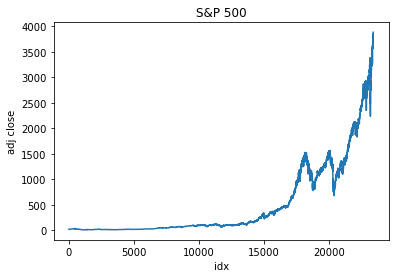

In [10]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.plot(data)
# plt.xlabel('idx')
# plt.ylabel('adj close')
# plt.title('S&P 500')

### Zadanie 3 [40 pkt]
Dla powyższych danych S&P 500, z wykorzystaniem naszych autorskich (!) modułów `statystyka` i `numseq` oblicz poszczególne statystyki. Najpierw przefiltruj dane, upewniając się, że są w nich tylko liczby [2 pkt].

Statystyka globalna (dla wszystkich wartości) [8 pkt - po 1 pkt]
* średnią arytmetyczną i kwadratową
* odchylenie standardowe
* kwartle (dolny, górny i medianę)
* kurtozę i skośność

Dla każdego roku (rok ma 365 dni, ale w weekendy giełda nie pracuje) [10 pkt]
* roczna średnia arytmetyczna, 3 pkt
* roczne odchylenie standardowe, 3 pkt
* od wszystkich danych w danym roku odejmij roczną średnią i zapisz te dane jako `reszty`, 4 pkt

Dla reszt, w każdym roku [6 pkt]
* oblicz średnią i odchylenie standardowe, 2 pkt
* oblicz medianę i odchylenie ćwiartkowe, 2 pkt
* znajdź wartości odstające obiema metodami, 2 pkt

Dla reszt bez wartości odstających oblicz [4 pkt]
* oblicz średnią i odchylenie standardowe, 2 pkt
* oblicz medianę i odchylenie ćwiartkowe, 2 pkt

Na sam koniec stwórz fajny, czytelny i bogaty w informacje raport [10 pkt]. Może być to funkcja `raport(data)` produkująca taki raport dla danych. Im więcej informacji i im bardziej czytelne tym więcej punktów.

> Punkty przyznajemy TYLKO gdy wykorzystacie prawidłowo moduły `statystyka` i `numseq`, za `numpy, scipy` czy inne `pandas`-y nie dajemy punktów!